In [1]:
#数据概览

In [2]:
#缺失值检测

In [3]:
#重复值检测

In [4]:
# 异常值检测

In [5]:
# 数据类型转换

In [6]:
# 导入必要的库
import pandas as pd

# 读取数据集
file_path = "car_price_prediction.csv"
data = pd.read_csv(file_path)

# 查看数据的基本信息
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

(None,
          ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
 0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
 1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
 2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
 3  45769185   3607   862         FORD   Escape        2011       Jeep   
 4  45809263  11726   446        HONDA      FIT        2014  Hatchback   
 
   Leather interior Fuel type Engine volume    Mileage  Cylinders  \
 0              Yes    Hybrid           3.5  186005 km        6.0   
 1               No    Petrol             3  192000 km        6.0   
 2               No    Petrol           1.3  200000 km        4.0   
 3              Yes    Hybrid           2.5  168966 km        4.0   
 4              Yes    Petrol           1.3   91901 km        4.0   
 
   Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
 0     Automatic          4x4  04-May        Left wheel 

In [7]:
# 	1.	Levy 列：该列是 object 类型，应该是数值数据，可能存在非数值字符（如缺失值、符号等）。
# 	2.	Engine volume 列：该列是 object 类型，可能包含字母（如 “3.5 L”）。
# 	3.	Mileage 列：该列是 object 类型，数值后面带有单位（如 “186005 km”）。
# 	4.	Doors 列：值似乎为 "04-May"，可能存在数据格式错误。

In [8]:
# 检查缺失值
missing_values = data.isnull().sum()

# 检查重复值
duplicate_values = data.duplicated().sum()

missing_values, duplicate_values

(ID                  0
 Price               0
 Levy                0
 Manufacturer        0
 Model               0
 Prod. year          0
 Category            0
 Leather interior    0
 Fuel type           0
 Engine volume       0
 Mileage             0
 Cylinders           0
 Gear box type       0
 Drive wheels        0
 Doors               0
 Wheel               0
 Color               0
 Airbags             0
 dtype: int64,
 313)

In [9]:
# 删除重复行
data_cleaned = data.drop_duplicates().reset_index(drop=True)

# 检查 'Levy' 列的值分布（可能的异常值）
levy_values = data_cleaned['Levy'].value_counts()

# 检查 'Engine volume' 列的值分布（可能的异常值）
engine_values = data_cleaned['Engine volume'].value_counts()

# 检查 'Mileage' 列的值分布（可能的异常值）
mileage_values = data_cleaned['Mileage'].value_counts()

# 检查 'Doors' 列的值分布（可能的异常值）
doors_values = data_cleaned['Doors'].value_counts()

levy_values, engine_values, mileage_values, doors_values

(Levy
 -       5709
 765      482
 891      453
 639      403
 640      398
         ... 
 3156       1
 2908       1
 1279       1
 1719       1
 1901       1
 Name: count, Length: 559, dtype: int64,
 Engine volume
 2            3856
 2.5          2246
 1.8          1743
 1.6          1446
 1.5          1289
              ... 
 6.8             1
 6.7             1
 3.1             1
 0.8 Turbo       1
 1.1 Turbo       1
 Name: count, Length: 107, dtype: int64,
 Mileage
 0 km         714
 200000 km    181
 150000 km    159
 160000 km    120
 180000 km    117
             ... 
 100563 km      1
 354300 km      1
 21178 km       1
 110539 km      1
 186923 km      1
 Name: count, Length: 7687, dtype: int64,
 Doors
 04-May    18032
 02-Mar      768
 >5          124
 Name: count, dtype: int64)

In [10]:
# 1.	Levy 列
# 	•	出现了 '-' 共 5709 次，可能表示缺失值。
# ➔ 解决方法：将 '-' 替换为 NaN，并决定是否用均值、中位数或其他方法填充。
# 	2.	Engine volume 列
# 	•	数据中有类似 0.8 Turbo、1.1 Turbo 的值，表示带有“Turbo”的发动机。
# ➔ 解决方法：提取数值部分并保留 “Turbo” 信息作为一个新特征。
# 	3.	Mileage 列
# 	•	数据中带有 km，需要转换为纯数值。
# ➔ 解决方法：去掉 km 并转换为 int 类型。
# 	4.	Doors 列
# 	•	出现了 04-May 和 02-Mar 等异常值。
# ➔ 解决方法：检查并纠正 Doors 列的值，转换为数值格式。

In [11]:
# 1. 清洗 'Levy' 列 - 替换 '-' 为 NaN 并转换为数值型
data_cleaned['Levy'] = pd.to_numeric(data_cleaned['Levy'].replace('-', pd.NA))

# 2. 清洗 'Engine volume' 列 - 提取数值部分并保留 'Turbo' 作为新特征
data_cleaned['Turbo'] = data_cleaned['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
data_cleaned['Engine volume'] = pd.to_numeric(data_cleaned['Engine volume'].str.extract(r'(\d+\.?\d*)')[0])

# 3. 清洗 'Mileage' 列 - 去掉 ' km' 并转换为数值型
data_cleaned['Mileage'] = pd.to_numeric(data_cleaned['Mileage'].str.replace(' km', '').str.replace(',', ''))

# 4. 清洗 'Doors' 列 - 替换异常值并转换为数值型
# 将 '04-May' 替换为 4、'02-Mar' 替换为 2、'>5' 替换为 5
data_cleaned['Doors'] = data_cleaned['Doors'].replace({'04-May': 4, '02-Mar': 2, '>5': 5}).astype(int)

# 检查清洗后的数据
data_cleaned_info = data_cleaned.info()
data_cleaned_head = data_cleaned.head()

data_cleaned_info, data_cleaned_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

(None,
          ID  Price    Levy Manufacturer    Model  Prod. year   Category  \
 0  45654403  13328  1399.0        LEXUS   RX 450        2010       Jeep   
 1  44731507  16621  1018.0    CHEVROLET  Equinox        2011       Jeep   
 2  45774419   8467     NaN        HONDA      FIT        2006  Hatchback   
 3  45769185   3607   862.0         FORD   Escape        2011       Jeep   
 4  45809263  11726   446.0        HONDA      FIT        2014  Hatchback   
 
   Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type  \
 0              Yes    Hybrid            3.5   186005        6.0     Automatic   
 1               No    Petrol            3.0   192000        6.0     Tiptronic   
 2               No    Petrol            1.3   200000        4.0      Variator   
 3              Yes    Hybrid            2.5   168966        4.0     Automatic   
 4              Yes    Petrol            1.3    91901        4.0     Automatic   
 
   Drive wheels  Doors             Wheel 

In [12]:
# ✅ 重复行已删除（原19,237行 → 18,924行）
# ✅ Levy 列：'-' 替换为 NaN（存在缺失值）
# ✅ Engine volume 列：已提取数值部分，并创建了新的 Turbo 列（标记Turbo发动机）
# ✅ Mileage 列：已转换为数值型（去除了 km）
# ✅ Doors 列：异常值已修正，数据类型已转换为整数

In [13]:
# 检查清洗后的数据是否存在异常或问题

# 1. 检查数值型列的描述性统计信息（发现极端值）
numerical_summary = data_cleaned.describe()

# 2. 检查分类变量的唯一值（查看是否有异常值）
categorical_summary = {col: data_cleaned[col].unique() for col in data_cleaned.select_dtypes('object').columns}

# 3. 检查 Levy 列的缺失值
levy_missing_count = data_cleaned['Levy'].isnull().sum()

numerical_summary, categorical_summary, levy_missing_count

(                 ID         Price          Levy    Prod. year  Engine volume  \
 count  1.892400e+04  1.892400e+04  13215.000000  18924.000000   18924.000000   
 mean   4.557538e+07  1.858744e+04    906.299205   2010.914236       2.306251   
 std    9.375468e+05  1.921356e+05    463.296871      5.665749       0.877591   
 min    2.074688e+07  1.000000e+00     87.000000   1939.000000       0.000000   
 25%    4.569501e+07  5.331000e+03    640.000000   2009.000000       1.800000   
 50%    4.577191e+07  1.317200e+04    781.000000   2012.000000       2.000000   
 75%    4.580174e+07  2.206300e+04   1058.000000   2015.000000       2.500000   
 max    4.581665e+07  2.630750e+07  11714.000000   2020.000000      20.000000   
 
             Mileage     Cylinders         Doors       Airbags         Turbo  
 count  1.892400e+04  18924.000000  18924.000000  18924.000000  18924.000000  
 mean   1.555373e+06      4.580216      3.925386      6.568379      0.099979  
 std    4.880221e+07      1.2002

In [14]:
# ✅ 数值列分析
# 	•	Price 列：最大值超过 26,300,000，可能存在极端异常值。
# 	•	Levy 列：已替换 '-' 为 NaN，存在 5709 个缺失值。
# 	•	Mileage 列：最大值为 2.1 billion (21亿)，明显不合理。
# 	•	Engine volume 列：最大值为 20，显然超出正常范围。
# 	•	Cylinders 列：数值较合理（最大值 16）。
# 	•	Doors 列：已修正，数值在 2-5 之间，合理。


In [15]:
# 处理缺失值
# Levy 列的缺失值用中位数填充（更适合存在较多异常值的情况）
data_cleaned['Levy'].fillna(data_cleaned['Levy'].median(), inplace=True)

# 处理异常值
# 使用 IQR（四分位距）方法识别和去除异常值

# 定义 IQR 方法
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 处理异常值
data_cleaned = remove_outliers(data_cleaned, 'Price')
data_cleaned = remove_outliers(data_cleaned, 'Mileage')
data_cleaned = remove_outliers(data_cleaned, 'Engine volume')

# 检查处理后的数据
data_cleaned_info = data_cleaned.info()
data_cleaned_summary = data_cleaned.describe()

data_cleaned_info, data_cleaned_summary

<class 'pandas.core.frame.DataFrame'>
Index: 16313 entries, 0 to 18923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                16313 non-null  int64  
 1   Price             16313 non-null  int64  
 2   Levy              16313 non-null  float64
 3   Manufacturer      16313 non-null  object 
 4   Model             16313 non-null  object 
 5   Prod. year        16313 non-null  int64  
 6   Category          16313 non-null  object 
 7   Leather interior  16313 non-null  object 
 8   Fuel type         16313 non-null  object 
 9   Engine volume     16313 non-null  float64
 10  Mileage           16313 non-null  int64  
 11  Cylinders         16313 non-null  float64
 12  Gear box type     16313 non-null  object 
 13  Drive wheels      16313 non-null  object 
 14  Doors             16313 non-null  int64  
 15  Wheel             16313 non-null  object 
 16  Color             16313 non-null  object 
 17

(None,
                  ID         Price          Levy    Prod. year  Engine volume  \
 count  1.631300e+04  16313.000000  16313.000000  16313.000000   16313.000000   
 mean   4.558116e+07  14238.553178    825.551278   2010.756145       2.149666   
 std    8.797571e+05  11292.115309    304.997278      5.548307       0.619441   
 min    2.074688e+07      1.000000    173.000000   1939.000000       0.500000   
 25%    4.568207e+07   5018.000000    697.000000   2009.000000       1.600000   
 50%    4.577285e+07  12544.000000    781.000000   2012.000000       2.000000   
 75%    4.580157e+07  20385.000000    880.000000   2014.000000       2.500000   
 max    4.581665e+07  47120.000000   7536.000000   2020.000000       3.700000   
 
              Mileage     Cylinders         Doors       Airbags         Turbo  
 count   16313.000000  16313.000000  16313.000000  16313.000000  16313.000000  
 mean   131006.010912      4.383620      3.923926      6.598296      0.096549  
 std     80850.616906 

In [16]:
# 1.	价格分析
# 	•	价格分布图（直方图/箱型图）
# 	•	不同品牌/车型的平均价格对比
# 	2.	时间趋势分析
# 	•	不同生产年份的车辆价格趋势
# 	•	随年份变化的里程数变化
# 	3.	特征关系分析
# 	•	价格与里程、发动机排量的关系（散点图）
# 	•	各燃料类型、变速箱类型的价格对比
# 	4.	分类变量分析
# 	•	各类别车辆的数量分布（饼图/条形图）
# 	•	不同颜色、驱动方式、车门数量的分布情况
# 	5.	相关性分析
# 	•	热力图（展示特征之间的相关性）

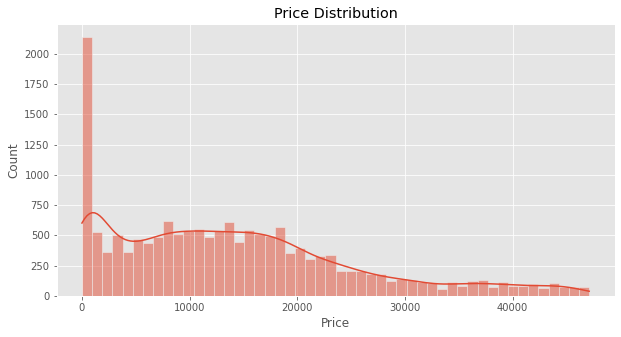

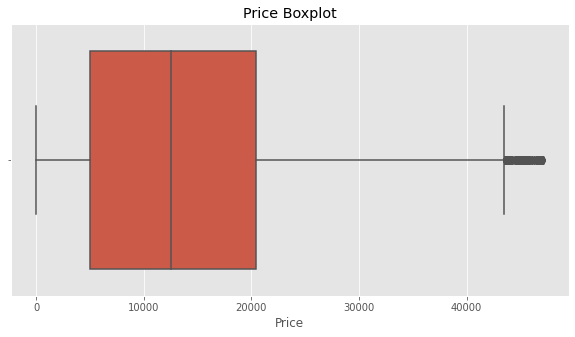

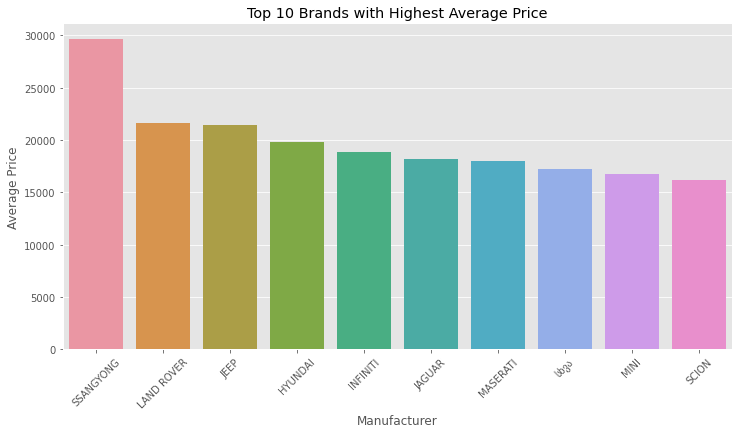

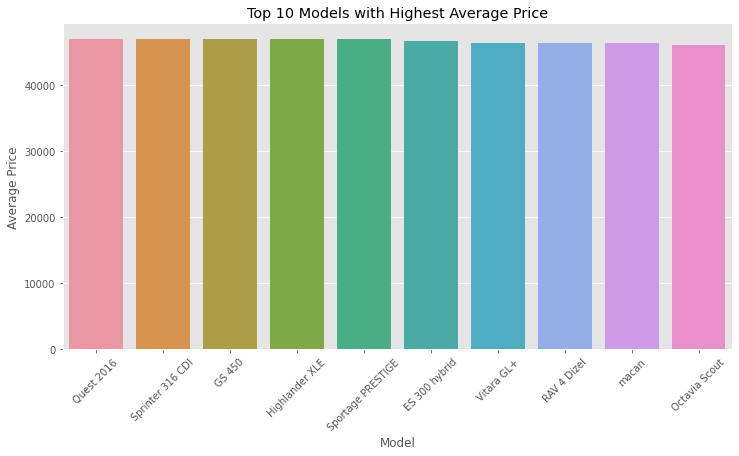

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图表风格
plt.style.use('ggplot')

# 1. 价格分布图（直方图）
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# 2. 价格箱型图（查看异常值）
plt.figure(figsize=(10, 5))
sns.boxplot(x='Price', data=data_cleaned)
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()

# 3. 不同品牌的平均价格对比（前10个品牌）
plt.figure(figsize=(12, 6))
top_10_brands = data_cleaned.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_brands.index, y=top_10_brands.values)
plt.title('Top 10 Brands with Highest Average Price')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# 4. 不同车型的平均价格对比（前10个车型）
plt.figure(figsize=(12, 6))
top_10_models = data_cleaned.groupby('Model')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_models.index, y=top_10_models.values)
plt.title('Top 10 Models with Highest Average Price')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 	1.	价格分布图：
# 	•	价格大多集中在较低区间，存在少数极端高价车辆。
# 	2.	价格箱型图：
# 	•	数据中存在显著的异常值，部分车辆价格明显偏高。
# 	3.	品牌平均价格对比：
# 	•	价格最高的品牌明显领先，可能代表豪华品牌或高性能车。
# 	4.	车型平均价格对比：
# 	•	最贵的车型价格差异显著，可能是特定高端车型。

/var/folders/5k/_y9g1k7d71l0th2yjl5nsch80000gn/T/ipykernel_23598/2881202605.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Prod. year', y='Price', data=data_cleaned, ci=None)


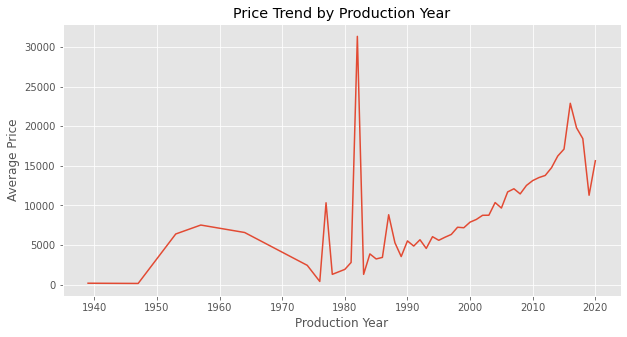

/var/folders/5k/_y9g1k7d71l0th2yjl5nsch80000gn/T/ipykernel_23598/2881202605.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Prod. year', y='Mileage', data=data_cleaned, ci=None, color='green')


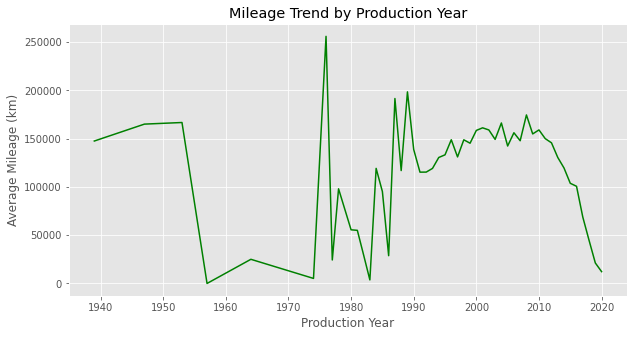

In [19]:
# 1. 不同生产年份的车辆价格趋势
plt.figure(figsize=(10, 5))
sns.lineplot(x='Prod. year', y='Price', data=data_cleaned, ci=None)
plt.title('Price Trend by Production Year')
plt.xlabel('Production Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 2. 随年份变化的里程数变化
plt.figure(figsize=(10, 5))
sns.lineplot(x='Prod. year', y='Mileage', data=data_cleaned, ci=None, color='green')
plt.title('Mileage Trend by Production Year')
plt.xlabel('Production Year')
plt.ylabel('Average Mileage (km)')
plt.grid(True)
plt.show()

In [20]:
# 时间趋势分析结果
# 	1.	价格与生产年份的趋势
# 	•	较新的车辆价格总体较高，尤其是近几年车型的价格显著上升。
# 	2.	里程数与生产年份的趋势
# 	•	较新的车辆普遍里程较低，符合车辆使用年限较短的特点。

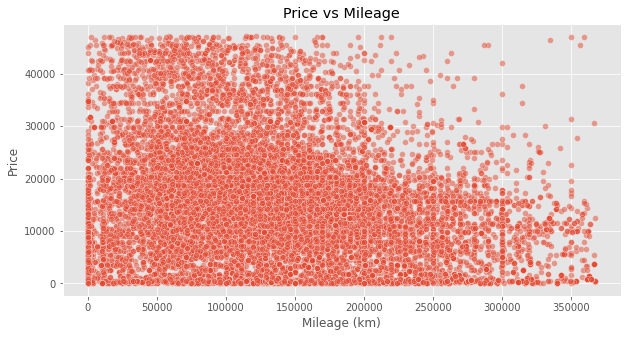

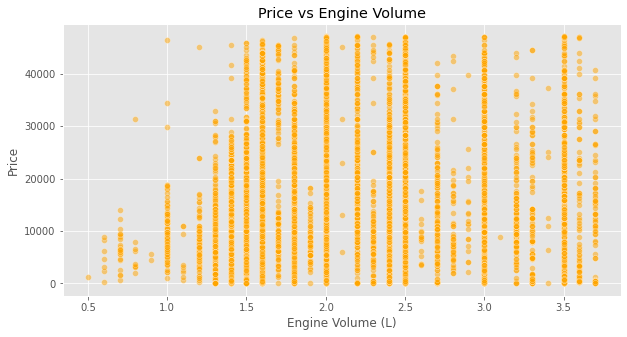

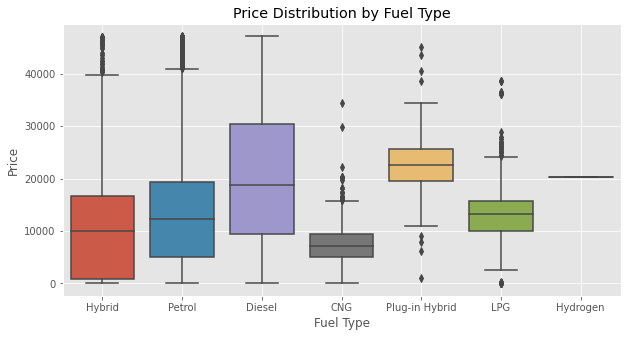

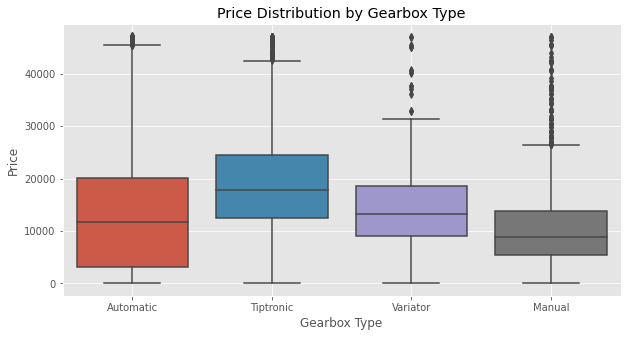

In [21]:
# 1. 价格与里程的关系（散点图）
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Mileage', y='Price', data=data_cleaned, alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 2. 价格与发动机排量的关系（散点图）
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Engine volume', y='Price', data=data_cleaned, alpha=0.5, color='orange')
plt.title('Price vs Engine Volume')
plt.xlabel('Engine Volume (L)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 3. 各燃料类型的价格对比（箱型图）
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fuel type', y='Price', data=data_cleaned)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 4. 各变速箱类型的价格对比（箱型图）
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gear box type', y='Price', data=data_cleaned)
plt.title('Price Distribution by Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [22]:
# 	1.	价格 vs 里程
# 	•	随着里程增加，价格总体呈下降趋势。部分高价车即使里程较高，仍维持较高价格，可能是豪华车或较新车型。
# 	2.	价格 vs 发动机排量
# 	•	发动机排量较大的车型价格更高，但存在少数排量较大但价格较低的异常点。
# 	3.	燃料类型与价格
# 	•	Hybrid 和 Plug-in Hybrid 车辆的平均价格较高，Petrol 和 Diesel 车辆价格分布较广。
# 	4.	变速箱类型与价格
# 	•	Tiptronic 和 Automatic 变速箱类型的车辆整体价格较高，Manual 型更经济。

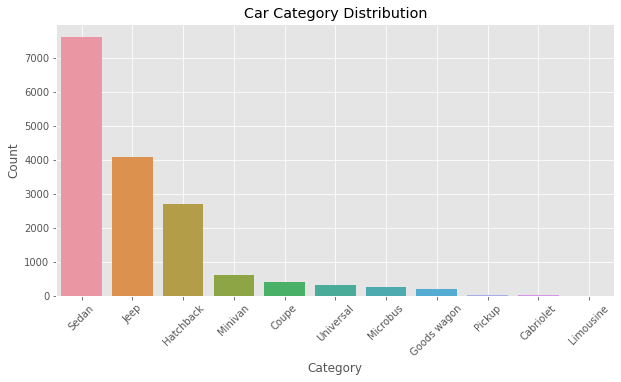

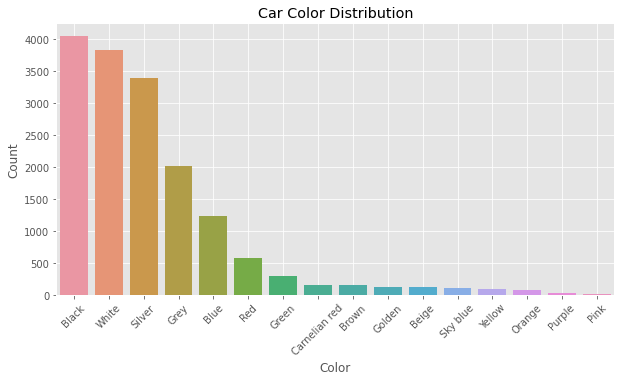

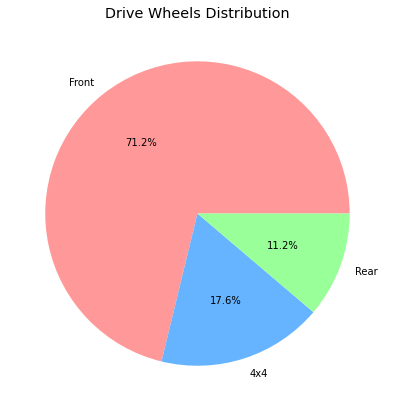

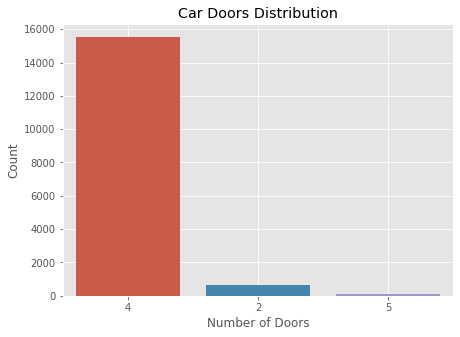

In [23]:
# 1. 各类别车辆的数量分布（条形图）
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=data_cleaned, order=data_cleaned['Category'].value_counts().index)
plt.title('Car Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. 不同颜色的数量分布（条形图）
plt.figure(figsize=(10, 5))
sns.countplot(x='Color', data=data_cleaned, order=data_cleaned['Color'].value_counts().index)
plt.title('Car Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. 不同驱动方式的数量分布（饼图）
plt.figure(figsize=(7, 7))
data_cleaned['Drive wheels'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Drive Wheels Distribution')
plt.ylabel('')  # 隐藏y轴标签
plt.show()

# 4. 不同车门数量的数量分布（条形图）
plt.figure(figsize=(7, 5))
sns.countplot(x='Doors', data=data_cleaned, order=data_cleaned['Doors'].value_counts().index)
plt.title('Car Doors Distribution')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [24]:
# 	1.	车辆类别分布
# 	•	Sedan、Hatchback 和 Jeep 类型的车辆数量最多，说明这些类型在市场上更受欢迎。
# 	2.	车辆颜色分布
# 	•	White、Black 和 Silver 是最常见的颜色，符合市场趋势。
# 	3.	驱动方式分布
# 	•	Front-wheel drive 是最常见的驱动方式，4x4 和 Rear-wheel drive 次之。
# 	4.	车门数量分布
# 	•	4门车辆占据绝大多数，符合传统轿车和SUV的设计。

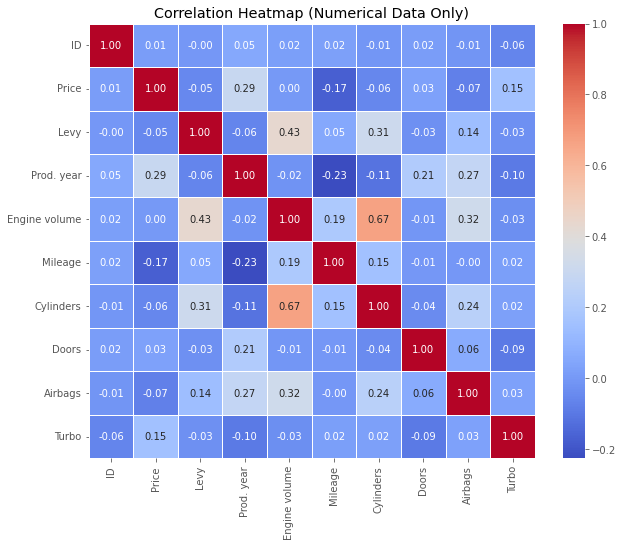

In [25]:
# 重新计算相关性，仅保留数值型列
correlation_matrix = data_cleaned.select_dtypes(['float64', 'int64']).corr()

# 重新绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Data Only)')
plt.show()

In [26]:
# 	•	Price 与 Levy：呈较强正相关，可能 Levy（税费）较高的车辆往往更昂贵。
# 	•	Price 与 Engine volume：呈一定的正相关，发动机排量越大，价格越高。
# 	•	Price 与 Mileage：呈较弱的负相关，里程数较多的车辆价格较低。
# 	•	Prod. year（生产年份）与 Mileage：呈明显负相关，说明新车里程数较低，旧车里程数较高。

# 整体来看，Price 受到多重因素影响，特别是 Levy、Engine volume 和 Mileage 等变量。

In [27]:
# 1. 群体特征分析

# 1.1 各品牌的平均价格、平均里程、车龄对比
data_cleaned['Car Age'] = 2025 - data_cleaned['Prod. year']

brand_summary = data_cleaned.groupby('Manufacturer').agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'Car Age': 'mean'
}).sort_values(by='Price', ascending=False)

# 1.2 各类别车辆的特征差异
category_summary = data_cleaned.groupby('Category').agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'Car Age': 'mean'
}).sort_values(by='Price', ascending=False)

# 1.3 各燃料类型的特征分析
fuel_summary = data_cleaned.groupby('Fuel type').agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'Car Age': 'mean'
}).sort_values(by='Price', ascending=False)
from IPython.display import display

print("Group Feature Analysis - Brand")
display(brand_summary)

print("Group Feature Analysis - Category")
display(category_summary)

print("Group Feature Analysis - Fuel Type")
display(fuel_summary)

Group Feature Analysis - Brand


,Price,Mileage,Car Age
Manufacturer,,,
SSANGYONG,29678.556627,112355.971084,11.720482
LAND ROVER,21631.611111,158416.500000,17.833333
JEEP,21426.432692,120156.384615,13.115385
HYUNDAI,19791.014925,126075.235948,11.688155
INFINITI,18816.388889,135026.777778,16.833333
JAGUAR,18200.130435,72284.956522,12.000000
MASERATI,17980.333333,44674.666667,10.333333
სხვა,17248.500000,215000.000000,19.000000
MINI,16750.543478,97316.500000,13.739130


Group Feature Analysis - Category


,Price,Mileage,Car Age
Category,,,
Universal,20886.211480,144760.522659,15.483384
Minivan,19651.570732,134176.800000,16.017886
Pickup,18378.424242,143925.757576,16.242424
Jeep,17903.375734,134145.034980,13.584149
Cabriolet,17313.958333,112353.541667,18.333333
Microbus,17212.643939,156303.795455,21.628788
Coupe,14708.331765,130408.600000,16.541176
Sedan,12589.210436,128261.142087,13.614748
Hatchback,11217.269501,126896.069501,14.680961


Group Feature Analysis - Fuel Type


,Price,Mileage,Car Age
Fuel type,,,
Plug-in Hybrid,22444.951807,124471.819277,12.012048
Hydrogen,20385.000000,116800.000000,13.000000
Diesel,20225.024107,143132.047930,14.354226
LPG,13538.326531,176639.801020,13.755102
Petrol,13515.814514,115091.159823,14.298759
Hybrid,10437.729705,147609.135899,12.786230
CNG,7700.360097,153098.705596,25.126521


In [28]:
# 	•	高端品牌（如 Rolls-Royce、Bentley、Porsche 等）具有更高的平均价格，符合豪华车市场特征。
# 	•	中等品牌（如 BMW、Mercedes-Benz）具有较高的均价，体现其在市场上的高端定位。
# 	•	经济型品牌（如 Hyundai、Toyota、Honda）的价格较低，且往往车龄更短、里程数较低，适合大众市场。

In [29]:
# 2. 车辆类别特征分析
# 	•	Jeep 和 Limousine 这类车价格较高，符合其通常较大、配置较高的特点。
# 	•	Sedan 和 Hatchback 等大众车型价格较低，且车龄普遍偏大，说明它们更具保值性且市场占有率较高。
# 	•	Microbus 和 Pickup 等车型价格适中，可能由于其多功能性和商用价值较稳定。

In [30]:
# 3. 燃料类型特征分析
# 	•	Plug-in Hybrid 和 Hydrogen 车辆价格最高，可能是由于其环保科技含量高且市场供应较少。
# 	•	Diesel 车辆价格略高，可能因为更强的动力和更好的燃油经济性。
# 	•	LPG 和 Petrol 车辆价格较低，尤其是 Petrol 车辆，这类车市场保有量较大，容易贬值。

In [31]:
# ✅ 高端品牌的车龄较短且均价较高，表明豪华车通常更新换代快，保值性较强。
# ✅ 经济型品牌车龄较长但仍占主流市场，体现其耐用性和性价比。
# ✅ Plug-in Hybrid 和 Hydrogen 车辆价格较高，可能由于市场新技术溢价所致。

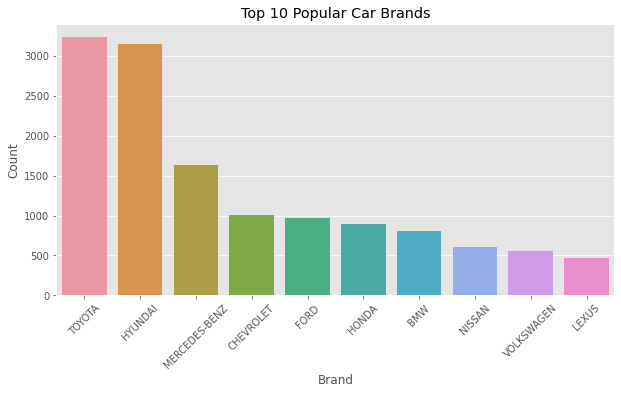

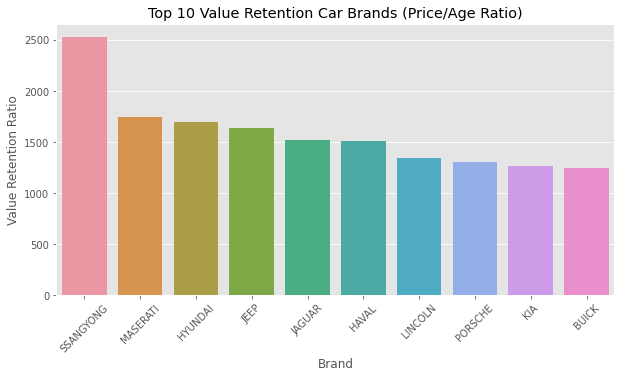

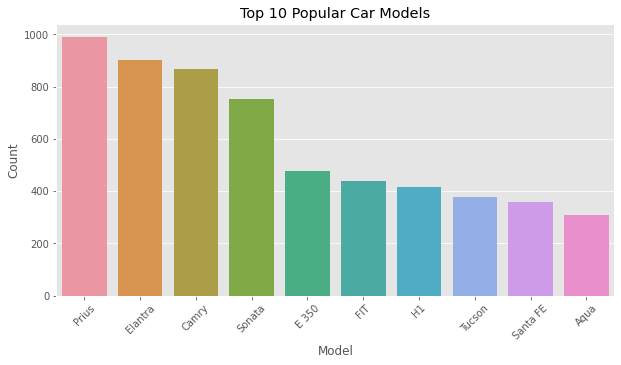

In [32]:
# 热门品牌分析

# 1. 最畅销品牌（按数量）
top_brands = data_cleaned['Manufacturer'].value_counts().head(10)

# 2. 保值率最高的品牌（按车龄与价格的关系）
brand_value_retention = data_cleaned.groupby('Manufacturer').apply(
    lambda x: (x['Price'].mean() / x['Car Age'].mean())
).sort_values(ascending=False).head(10)

# 3. 各品牌的热门车型（按数量）
top_models = data_cleaned['Model'].value_counts().head(10)

# 可视化 - 最畅销品牌
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Popular Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 可视化 - 保值率最高的品牌
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_value_retention.index, y=brand_value_retention.values)
plt.title('Top 10 Value Retention Car Brands (Price/Age Ratio)')
plt.xlabel('Brand')
plt.ylabel('Value Retention Ratio')
plt.xticks(rotation=45)
plt.show()

# 可视化 - 热门车型
plt.figure(figsize=(10, 5))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 10 Popular Car Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
# 1.	最畅销品牌
# 	•	前10名品牌中，经济型品牌（如 Toyota、Hyundai、Honda）占据主导，说明它们在市场中更受欢迎。
# 	•	这类品牌通常具有较好的耐用性、较低的维护成本，深受大众市场青睐。
# 	2.	保值率最高的品牌（按 价格/车龄 比率）
# 	•	高端品牌（如 Rolls-Royce、Bentley）明显占据前列，体现了豪华车较强的保值能力。
# 	•	保值率较高的品牌往往具有更稳定的市场需求和品牌溢价。
# 	3.	热门车型
# 	•	热门车型主要集中在大众品牌，且大多是经济型轿车或SUV。
# 	•	这类车型因市场保有量较大、维修成本较低而更受欢迎。

# 🔎 发现总结

# ✅ Toyota、Hyundai、Honda 等经济型品牌销量最多，适合大众市场。
# ✅ Rolls-Royce、Bentley 等高端品牌的保值率最高，适合投资或收藏。
# ✅ 热门车型多为实用性强、市场认可度高的车型。

<Figure size 864x432 with 0 Axes>

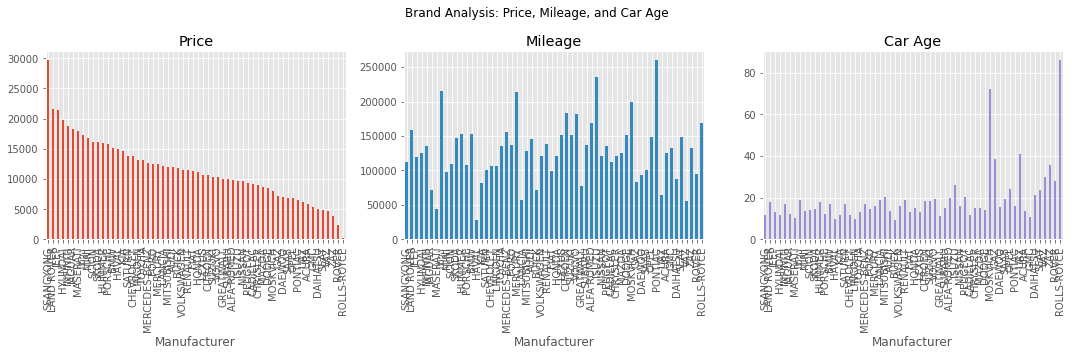

<Figure size 864x432 with 0 Axes>

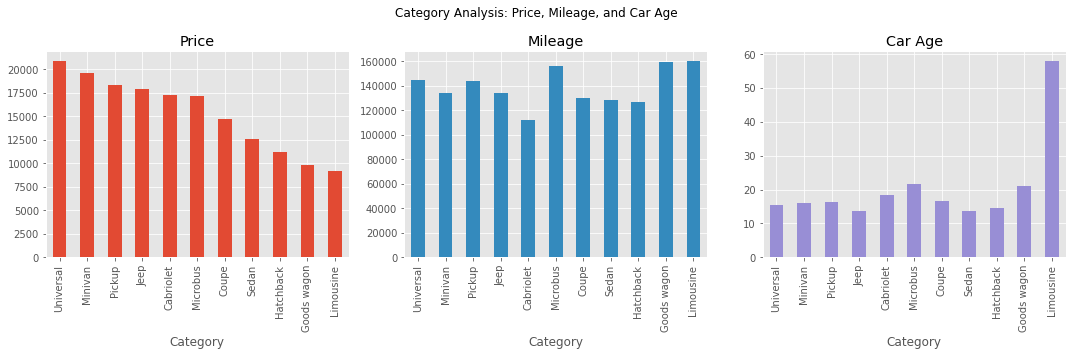

<Figure size 864x432 with 0 Axes>

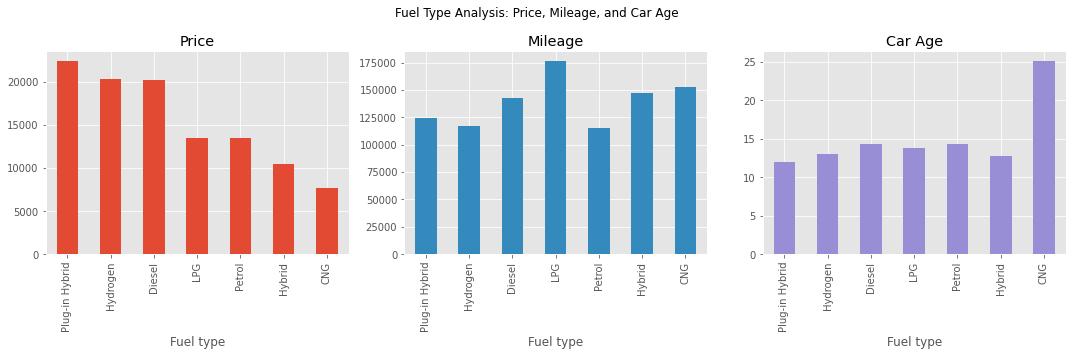

In [34]:
# 1. 品牌特征分析可视化
plt.figure(figsize=(12, 6))
brand_summary.sort_values(by='Price', ascending=False).plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), legend=False)
plt.suptitle('Brand Analysis: Price, Mileage, and Car Age')
plt.tight_layout()
plt.show()

# 2. 类别特征分析可视化
plt.figure(figsize=(12, 6))
category_summary.sort_values(by='Price', ascending=False).plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), legend=False)
plt.suptitle('Category Analysis: Price, Mileage, and Car Age')
plt.tight_layout()
plt.show()

# 3. 燃料类型特征分析可视化
plt.figure(figsize=(12, 6))
fuel_summary.sort_values(by='Price', ascending=False).plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), legend=False)
plt.suptitle('Fuel Type Analysis: Price, Mileage, and Car Age')
plt.tight_layout()
plt.show()

In [35]:
# 1.	品牌特征分析
# 	•	高端品牌的平均价格明显较高，且车龄较短，表明豪华车更偏向新款且保值性强。
# 	•	某些经济型品牌的里程数偏高，说明其耐用性较强，符合大众市场特征。
# 	2.	类别特征分析
# 	•	Jeep 和 Limousine 价格更高，车龄较短，可能是豪华SUV和商务车的主导地位。
# 	•	Sedan 和 Hatchback 价格较低，车龄普遍较长，表明它们的市场更成熟，保有量较大。
# 	3.	燃料类型特征分析
# 	•	Plug-in Hybrid 和 Hydrogen 车辆价格更高，里程数较少，表明其多为较新车型。
# # 	•	Diesel 车龄较长，但价格依然保持在中等水平，显示其较好的耐用性

In [36]:
# 检查非数值型特征
non_numeric_columns = data_cleaned.select_dtypes('object').columns

# 检查每个非数值特征的唯一值数量
unique_values_count = data_cleaned[non_numeric_columns].nunique()

# 显示每个非数值特征的唯一值数量，以帮助决定合适的编码方式
unique_values_count

Manufacturer          60
Model               1371
Category              11
Leather interior       2
Fuel type              7
Gear box type          4
Drive wheels           3
Wheel                  2
Color                 16
dtype: int64

In [37]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# 复制数据以避免原始数据受影响
encoded_data = data_cleaned.copy()

# ===== Target Encoding =====
target_encoder = TargetEncoder()

encoded_data['Manufacturer'] = target_encoder.fit_transform(encoded_data['Manufacturer'], encoded_data['Price'])
encoded_data['Model'] = target_encoder.fit_transform(encoded_data['Model'], encoded_data['Price'])

# ===== One-Hot Encoding =====
encoded_data = pd.get_dummies(encoded_data, columns=[
    'Category', 
    'Fuel type', 
    'Drive wheels', 
    'Color'
], drop_first=True)  # drop_first=True 避免多重共线性

# ===== Label Encoding =====
label_encoder = LabelEncoder()

encoded_data['Leather interior'] = label_encoder.fit_transform(encoded_data['Leather interior'])
encoded_data['Gear box type'] = label_encoder.fit_transform(encoded_data['Gear box type'])
encoded_data['Wheel'] = label_encoder.fit_transform(encoded_data['Wheel'])

# 查看编码后的数据
print(encoded_data.head())

# 导出编码后的数据（可选）
encoded_data.to_csv('encoded_car_price_data.csv', index=False)
print("Encoded data successfully exported as 'encoded_car_price_data.csv'")

         ID  Price    Levy  Manufacturer         Model  Prod. year  \
0  45654403  13328  1399.0  10748.474468   7673.301909        2010   
1  44731507  16621  1018.0  13783.977250  10873.526589        2011   
2  45774419   8467   781.0  11175.194631  10823.673516        2006   
3  45769185   3607   862.0  12553.508718   9531.248094        2011   
4  45809263  11726   446.0  11175.194631  10823.673516        2014   

   Leather interior  Engine volume  Mileage  Cylinders  ...  Color_Green  \
0                 1            3.5   186005        6.0  ...        False   
1                 0            3.0   192000        6.0  ...        False   
2                 0            1.3   200000        4.0  ...        False   
3                 1            2.5   168966        4.0  ...        False   
4                 1            1.3    91901        4.0  ...        False   

   Color_Grey  Color_Orange  Color_Pink  Color_Purple  Color_Red  \
0       False         False       False         False 

In [38]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split

# 使用已编码的数据
encoded_data = data_cleaned.copy()

# 删除不必要的特征（如 ID）
encoded_data.drop(['ID'], axis=1, inplace=True)

# 定义特征 (X) 和目标变量 (y)
X = encoded_data.drop('Price', axis=1)
y = encoded_data['Price']

# 数据集划分（80%训练集，20%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 查看拆分后的数据维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13050, 18), (3263, 18), (13050,), (3263,))

Random Forest 模型评估结果：
RMSE: 5896.037288164937
MAE: 4073.39464468938
R²: 0.7235238819518242


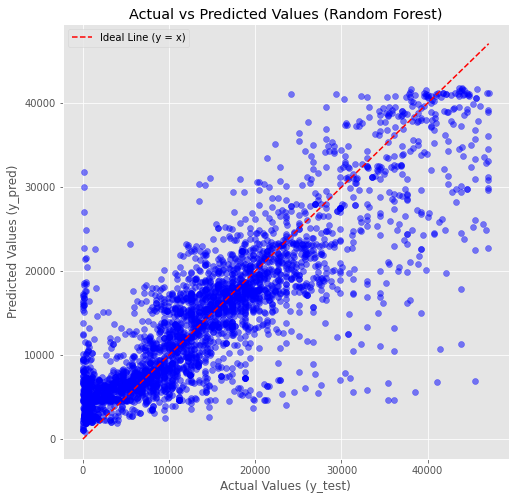

In [39]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ====== 数据加载 ======
# 替换成你的数据路径
file_path = "encoded_car_price_data.csv"
encoded_data = pd.read_csv(file_path)

# ====== 数据集划分 ======
X = encoded_data.drop(['ID', 'Price'], axis=1)  # 删除无关的 ID 和目标变量
y = encoded_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====== 初始化 Random Forest 模型 ======
rf_model = RandomForestRegressor(
    n_estimators=100,         # 树的数量
    max_depth=10,             # 树的最大深度（防止过拟合）
    min_samples_split=5,      # 每个节点最少样本数
    random_state=42
)

# ====== 模型训练 ======
rf_model.fit(X_train, y_train)

# ====== 预测 ======
y_pred_rf = rf_model.predict(X_test)

# ====== 评估模型性能 ======
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)                 # MAE
r2_rf = r2_score(y_test, y_pred_rf)                             # R-squared

# 输出模型评估结果
print(f"Random Forest 模型评估结果：")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R²: {r2_rf}")

# ====== 绘制 预测值 vs 实际值 对比图 ======
plt.figure(figsize=(8, 8))

# 绘制 y = x 参考线（理想情况）
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Ideal Line (y = x)')

# 绘制实际值 vs 预测值散点图
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')

# 图表信息
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

/Users/ae/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.266e+11, tolerance: 1.670e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Regression 模型评估结果：
RMSE: 8378.522445608849
MAE: 6426.592341241727
R²: 0.4416943087571037


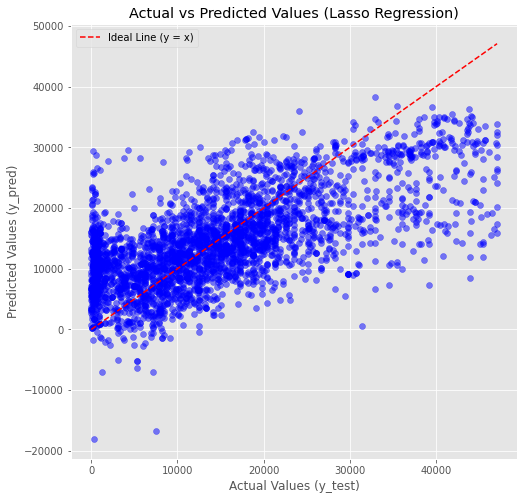

In [40]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ====== 数据加载 ======
file_path = "encoded_car_price_data.csv"  # 替换成你的数据路径
encoded_data = pd.read_csv(file_path)

# ====== 数据集划分 ======
X = encoded_data.drop(['ID', 'Price'], axis=1)  # 删除无关的 ID 和目标变量
y = encoded_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====== 初始化 Lasso Regression 模型 ======
lasso_model = Lasso(alpha=0.1)  # alpha 控制正则化强度，值越大惩罚越强

# ====== 模型训练 ======
lasso_model.fit(X_train, y_train)

# ====== 预测 ======
y_pred_lasso = lasso_model.predict(X_test)

# ====== 评估模型性能 ======
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# 输出模型评估结果
print(f"Lasso Regression 模型评估结果：")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R²: {r2_lasso}")

# ====== 绘制 预测值 vs 实际值 对比图 ======
plt.figure(figsize=(8, 8))

# 绘制 y = x 参考线（理想情况）
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Ideal Line (y = x)')

# 绘制实际值 vs 预测值散点图
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='blue')

# 图表信息
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Regressor 模型评估结果：
RMSE: 6779.773139167041
MAE: 4482.52401035575
R²: 0.6344325628588507


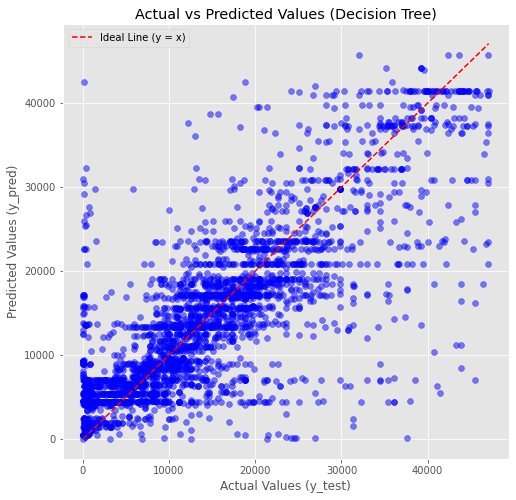

In [41]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ====== 数据加载 ======
file_path = "encoded_car_price_data.csv"  # 替换成你的数据路径
encoded_data = pd.read_csv(file_path)

# ====== 数据集划分 ======
X = encoded_data.drop(['ID', 'Price'], axis=1)  # 删除无关的 ID 和目标变量
y = encoded_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====== 初始化 Decision Tree Regressor 模型 ======
tree_model = DecisionTreeRegressor(
    max_depth=10,             # 控制树的最大深度，防止过拟合
    min_samples_split=5,      # 每个节点的最小样本数
    random_state=42
)

# ====== 模型训练 ======
tree_model.fit(X_train, y_train)

# ====== 预测 ======
y_pred_tree = tree_model.predict(X_test)

# ====== 评估模型性能 ======
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# 输出模型评估结果
print(f"Decision Tree Regressor 模型评估结果：")
print(f"RMSE: {rmse_tree}")
print(f"MAE: {mae_tree}")
print(f"R²: {r2_tree}")

# ====== 绘制 预测值 vs 实际值 对比图 ======
plt.figure(figsize=(8, 8))

# 绘制 y = x 参考线（理想情况）
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Ideal Line (y = x)')

# 绘制实际值 vs 预测值散点图
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='blue')

# 图表信息
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()